<a href="https://colab.research.google.com/github/Maureen36Mathenge/Determinants-of-House-prices-/blob/master/Moringa_IP_Week_7_Maureen_Mathenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Define the Question 

Study factors that affect houses prices
Create a model that will predict future prices 
#Metric of Success

Getting a model that has a high accuracy

#Context

Currently in Kenya, house price has become relatively expensive.This is as a result to increase in  land.However,there are other factors that make housing expensive,Luxury.A house that has many bedrooms,bathrooms are highly priced.The views of the houses could lead to an increase as well as the neighbourhood you are living in.
The more secure,accessible and luxurious the house is the more valuable the house will get 


#Experimental design
1.Business Understanding 

**Objectives**
1. Increase the sales for the houses hence improving profits 
2. Know the target customers for certain houses characteristcs

2.Data Understanding
3.Data Preparation
4.Modelling
5.Evaluation
6.Deployment


#Import Libraries

In [0]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

 #Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy as sp
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import ElasticNet


#Upload the dataset 

In [5]:
df =  pd.read_csv("http://bit.ly/IndependentProjectWeek7Dataset")
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [6]:
df.condition.unique()

array([3, 5, 4, 1, 2])

I check to have a rough idea on the column "condition"
5-the house is expensive meaning its it is of good condition
1-the condition is poor

In [7]:
#Let figure the number of columns we are working with 
df.shape

(21613, 20)

We have 21613 rows and 20 columns

In [0]:
#Get the data types for all the columns
df.dtypes

#Data Cleaning 
For the sake of modelling and just ethical principles of working we clean data,we shall take several steps to check how clean or data is


##1.Validity

In [0]:
#create a function that can pass any dataframe
def plot_boxplots(target_dataframe,col_names):
    fig, ax = plt.subplots(len(col_names), figsize=(10,80))
    for i, column_name in enumerate(col_names):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=10)
        ax[i].set_xlabel(column_name, fontsize=8)
    plt.show()

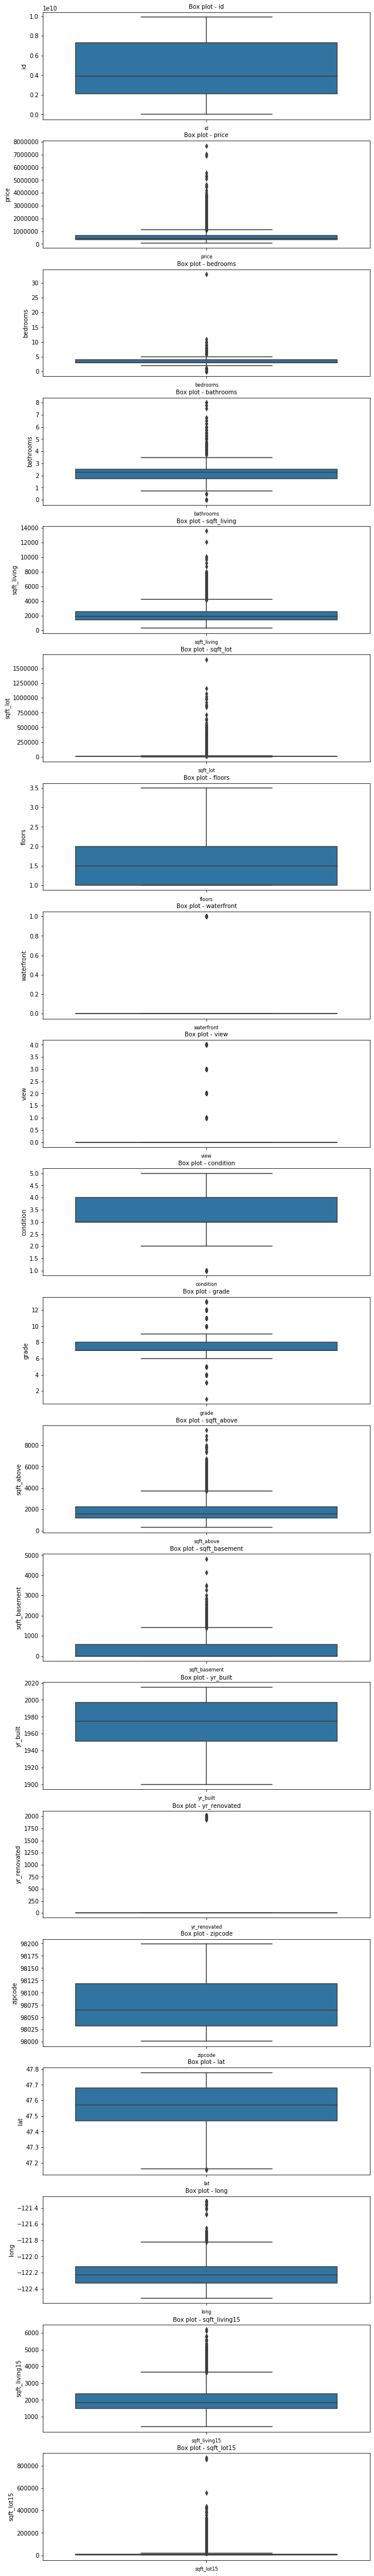

In [9]:
#Execute the function
col_names = df.columns
target_dataframe = df
plot_boxplots(target_dataframe,col_names)

There are a number of outliers in the dataset.

This is due to a number of factors.
For the prices,they could be high due to their locationn as well as the amenities it has. 
We also see that some amenities are not likely to be found in many houses eg the Waterfront.
It's expected that houses with this amenity are expensive as well.

Since the company's aim is to get profit,we also expect they shall maximize the spaces available to them.
Therefore ,houses that take up more spaces,are more expensive.
This is because the land cost is very high due to certain factors. 

In [10]:
def year_renovated(x):
  if x > 0:
    return '1'
  else:
    return '0'

# creating a new column to give the match oucome
df['year_renovated'] = df.yr_renovated.apply(lambda x: year_renovated(x))
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_renovated
0,7129300520,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,0
1,6414100192,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,1
2,5631500400,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,0
3,2487200875,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,0
4,1954400510,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,0


In the column year renovated i shall convert the rows with years with 1 to show that the house was renovated
This is for the sake of uniformity

Drop the old column

In [0]:
df = df.drop(["yr_renovated"],axis=1)

In [0]:
#view the row that has the outlier 
y = (df[df["bedrooms"] >= 30]).index


The row with 33 bedrooms must have been filled in wrong since it has one bedroom and its of grade 7
I decided to get rid of it

In [0]:
#drop
df = df.drop(y)

In [17]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year_renovated
0,7129300520,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,98178,47.511,-122.257,1340,5650,0
1,6414100192,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,98125,47.721,-122.319,1690,7639,1
2,5631500400,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,98028,47.738,-122.233,2720,8062,0
3,2487200875,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,98136,47.521,-122.393,1360,5000,0
4,1954400510,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,98074,47.617,-122.045,1800,7503,0


In [18]:
(df[df["bedrooms"] >= 30])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year_renovated


##2.Completeness

In [19]:
 df.isnull().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
year_renovated    0
dtype: int64

The dataset is complete

##3.Consistency

In [0]:
df.duplicated().sum()

From the dataset we have 3 duplicates
We shall go with the option of dropping them  

In [0]:
df = df.drop_duplicates()
df.head()

#Exploratory Data Analysis



##Univariate Analysis
##Measure of central tendency

This will give us more insights on our dataset 

In [20]:
df.shape

(21612, 20)

This is the number of rows and columns we have after dropping the duplicates

In [21]:
#Get insights on the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,21612.000,21612.000,21612.000,21612.000,21612.000,21612.000,21612.000,21612.000,21612.000,21612.000,21612.000,21612.000,21612.000,21612.000,21612.000,21612.000,21612.000,21612.000,21612.000
mean,4580402307.494,540177.540,3.369,2.115,2079.921,15107.389,1.494,0.008,0.234,3.409,7.657,1788.425,291.496,1971.006,98077.939,47.560,-122.214,1986.583,12768.829
std,2876593961.954,367370.104,0.908,0.770,918.457,41421.423,0.540,0.087,0.766,0.651,1.175,828.094,442.581,29.374,53.506,0.139,0.141,685.393,27304.756
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049189.250,321837.500,3.000,1.750,1426.500,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930470.000,450000.000,3.000,2.250,1910.000,7619.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900456.250,645000.000,4.000,2.500,2550.000,10688.250,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,98118.000,47.678,-122.125,2360.000,10083.250
max,9900000190.000,7700000.000,11.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


We have a price mean of 540178 and a median of 450000

TypeError: ignored

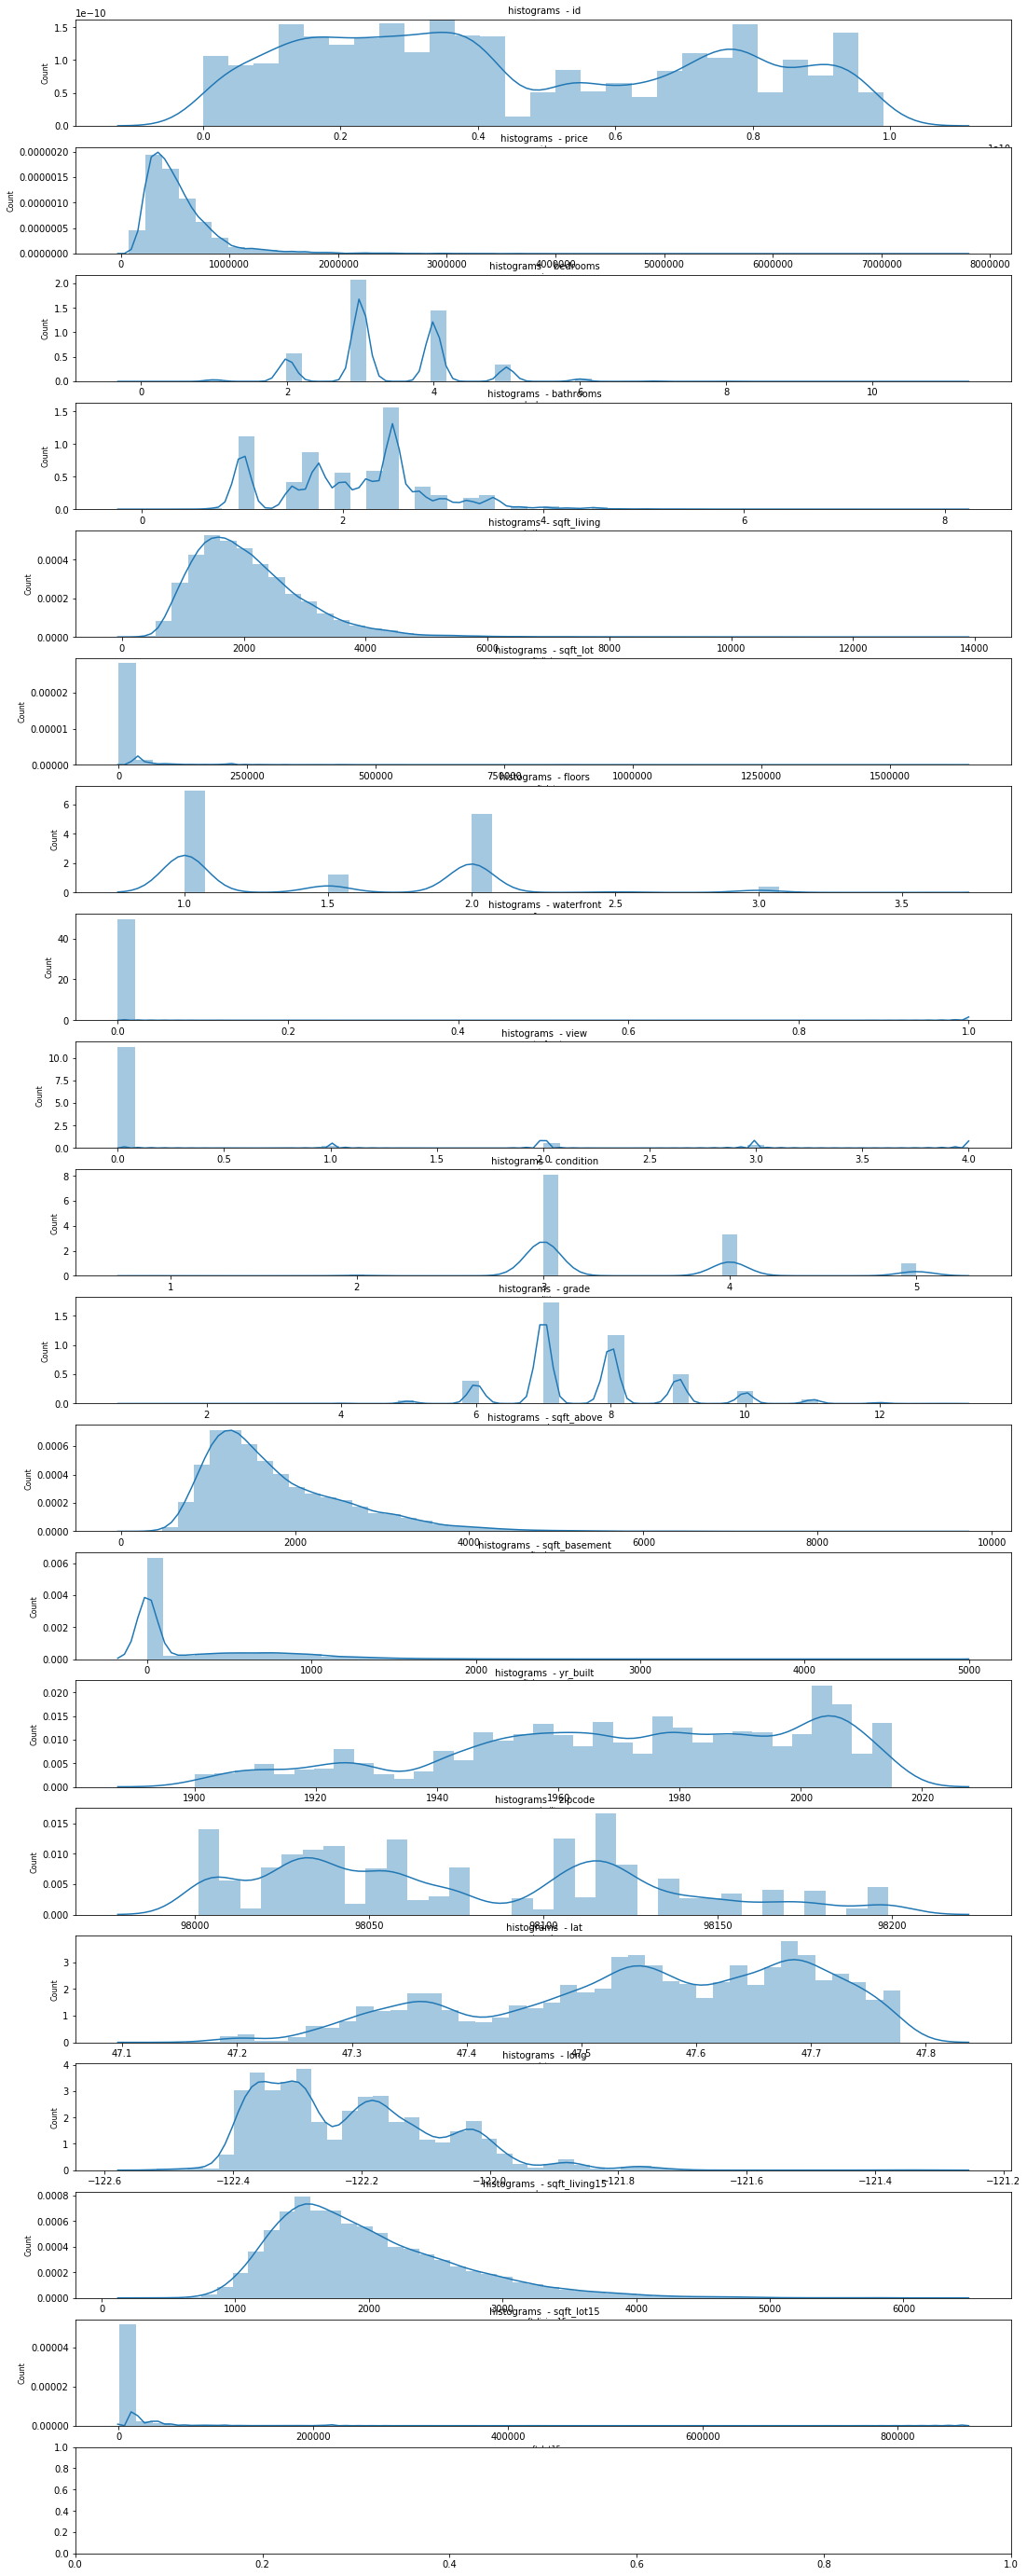

In [23]:
col_names = df.columns

fig, ax = plt.subplots(len(col_names), figsize=(18,50))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title(' histograms  - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [0]:
from matplotlib import pyplot
names = df.columns
df.hist(figsize=(15,30))

pyplot.show()

##Bivariate Analysis

In [0]:
#plot price vs the number of bedroom
plt.scatter(df["bedrooms"],df["price"])
plt.ylabel("house price")
plt.xlabel("number of bedrooms")
plt.title("price vs number of bedrooms")

Text(0.5, 1.0, 'price vs condition of the house')

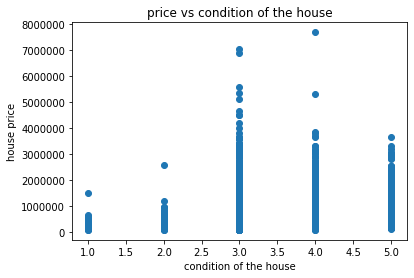

In [24]:
plt.scatter(df["condition"],df["price"])
plt.ylabel("house price")
plt.xlabel("condition of the house")
plt.title("price vs condition of the house")

Text(0.5, 1.0, 'price vs bathrooms')

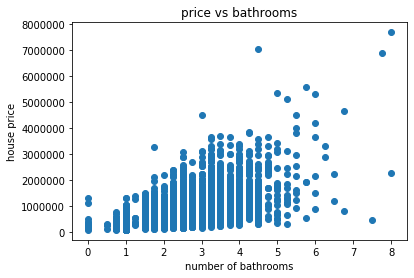

In [25]:
plt.scatter(df["bathrooms"],df["price"])
plt.ylabel("house price")
plt.xlabel("number of bathrooms")
plt.title("price vs bathrooms")

Text(0.5, 1.0, 'price vs sqft_living')

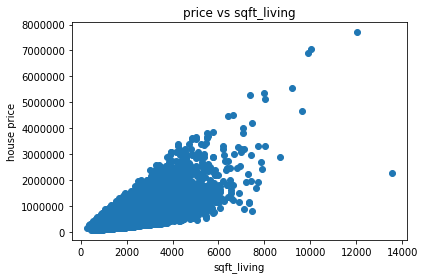

In [26]:
plt.scatter(df["sqft_living"],df["price"])
plt.ylabel("house price")
plt.xlabel("sqft_living")
plt.title("price vs sqft_living")

Text(0.5, 1.0, 'price vs view')

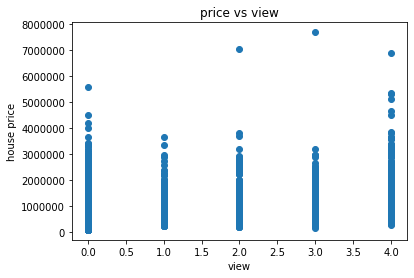

In [27]:
plt.scatter(df["view"],df["price"])
plt.ylabel("house price")
plt.xlabel("view")
plt.title("price vs view")

Text(0.5, 1.0, 'price vs floors')

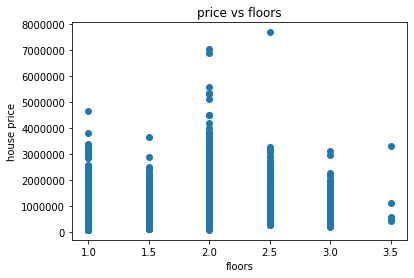

In [28]:
plt.scatter(df["floors"],df["price"])
plt.ylabel("house price")
plt.xlabel("floors")
plt.title("price vs floors")

Text(0.5, 1.0, 'price vs waterfront')

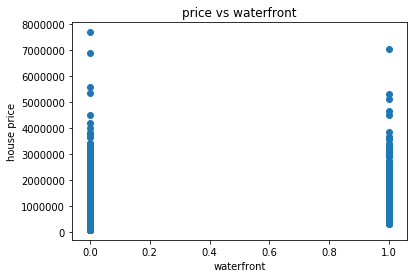

In [29]:
plt.scatter(df["waterfront"],df["price"])
plt.ylabel("house price")
plt.xlabel("waterfront")
plt.title("price vs waterfront")

Text(0.5, 1.0, 'price vs sqft_living15')

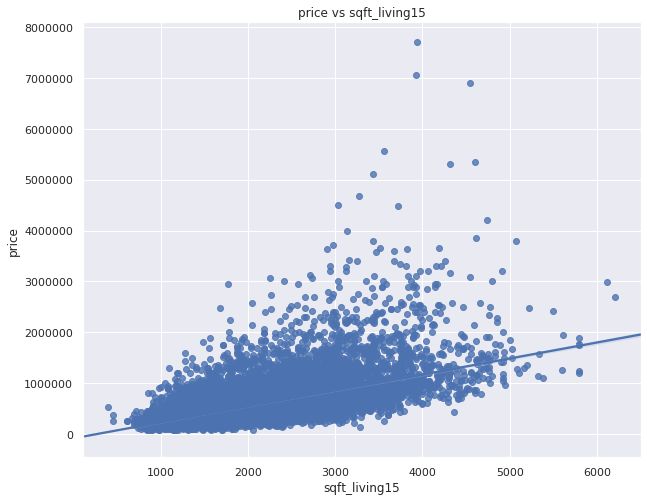

In [30]:
sns.set(rc={"figure.figsize":(10,8)})
sns.regplot(x=df["sqft_living15"],y=df["price"],fit_reg=True)
plt.title("price vs sqft_living15")

Text(0.5, 1.0, 'price vs sqft_living15')

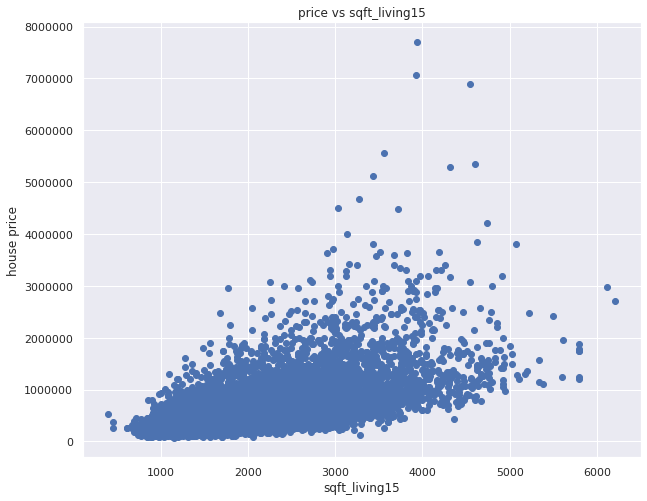

In [32]:
plt.scatter(df["sqft_living15"],df["price"])
plt.ylabel("house price")
plt.xlabel("sqft_living15")
plt.title("price vs sqft_living15")

Text(0.5, 1.0, 'price vs ssqft_basement')

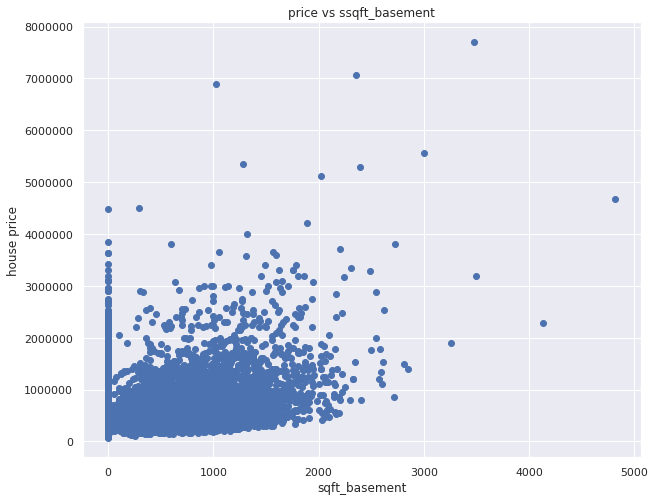

In [33]:
plt.scatter(df["sqft_basement"],df["price"])
plt.ylabel("house price")
plt.xlabel("sqft_basement")
plt.title("price vs ssqft_basement")

Text(0.5, 1.0, 'price vs yr_built')

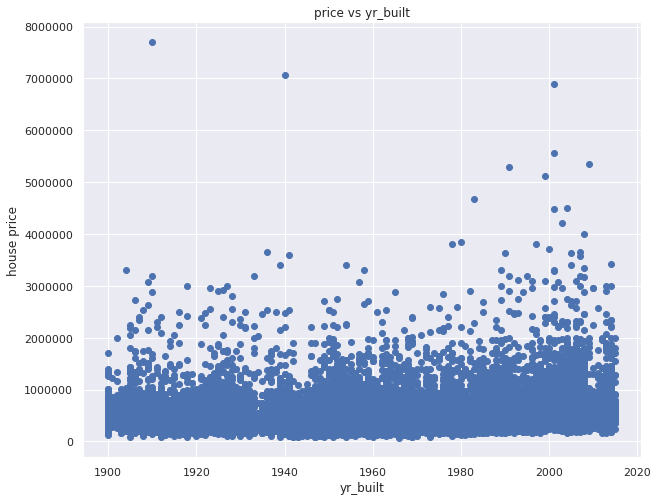

In [34]:
plt.scatter(df["yr_built"],df["price"])
plt.ylabel("house price")
plt.xlabel("yr_built")
plt.title("price vs yr_built")

Text(0.5, 1.0, 'price vs yr_renovated')

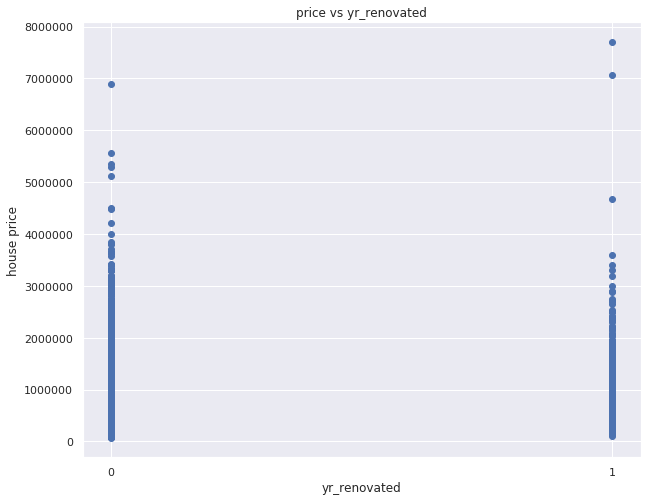

In [35]:
plt.scatter(df["year_renovated"],df["price"])
plt.ylabel("house price")
plt.xlabel("yr_renovated")
plt.title("price vs yr_renovated")

Text(0.5, 1.0, 'price vs grade')

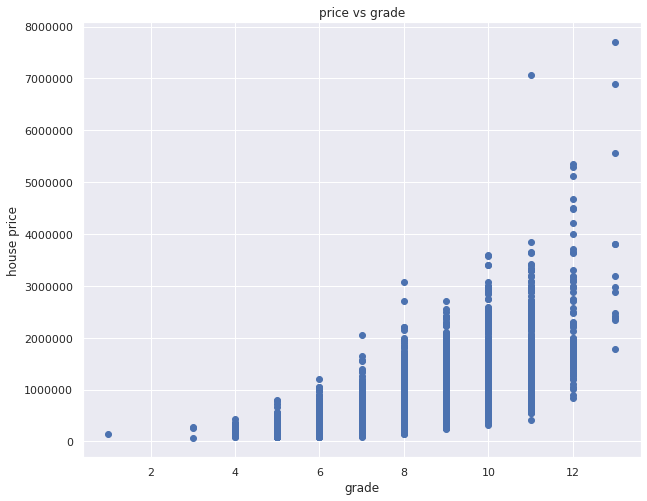

In [36]:
plt.scatter(df["grade"],df["price"])
plt.ylabel("house price")
plt.xlabel("grade")
plt.title("price vs grade")

I have made an observation that most houses are quite pricey.This is because their ratings are really high 

I concluded that these houses are likely to be in a very valuable neighbourhood

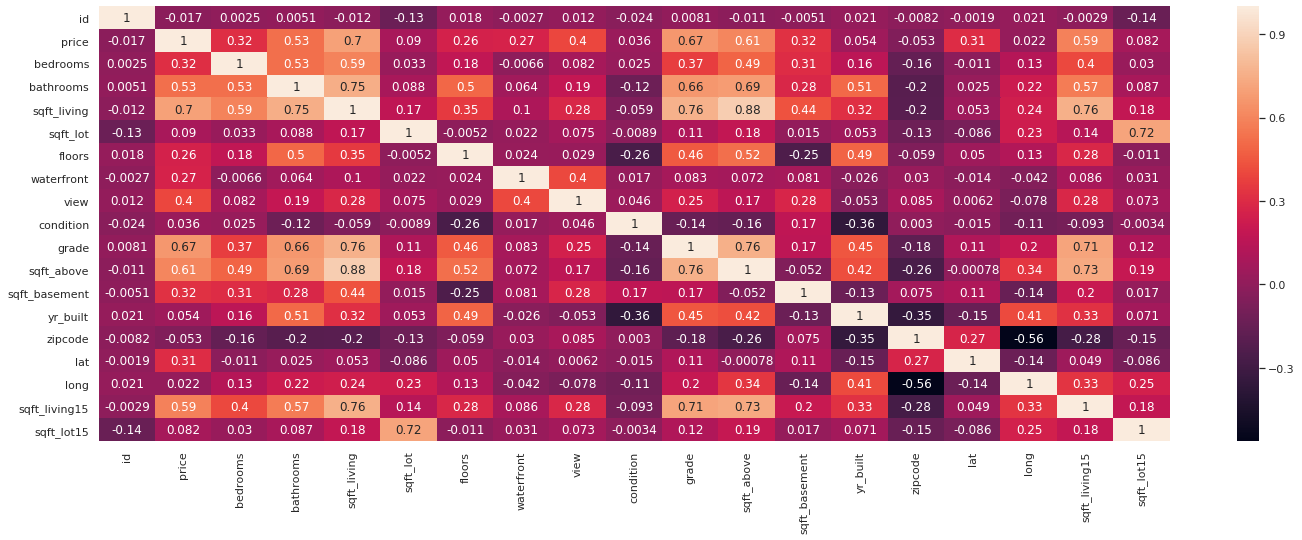

In [37]:
plt.figure(figsize=(24, 8))

vg_corr = df.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

There is a strong relationship of 0.76 between sqft_living15 and sqft_living
A strong relationship of 0.72 also exists between  sqft_lot and sqft_loft15

Hence,they will be peforming the same task when we build a model
We can therefore remove one of them 

#Dropping columns 
I went ahead and dropped columns that i shall not use based on my EDA analysis

In [38]:
houses = df.drop(["id","zipcode","lat","long","sqft_living","sqft_lot","sqft_above"],axis=1)
houses.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_living15,sqft_lot15,year_renovated
0,221900.000,3,1.000,1.000,0,0,3,7,0,1955,1340,5650,0
1,538000.000,3,2.250,2.000,0,0,3,7,400,1951,1690,7639,1
2,180000.000,2,1.000,1.000,0,0,3,6,0,1933,2720,8062,0
3,604000.000,4,3.000,1.000,0,0,5,7,910,1965,1360,5000,0
4,510000.000,3,2.000,1.000,0,0,3,8,0,1987,1800,7503,0


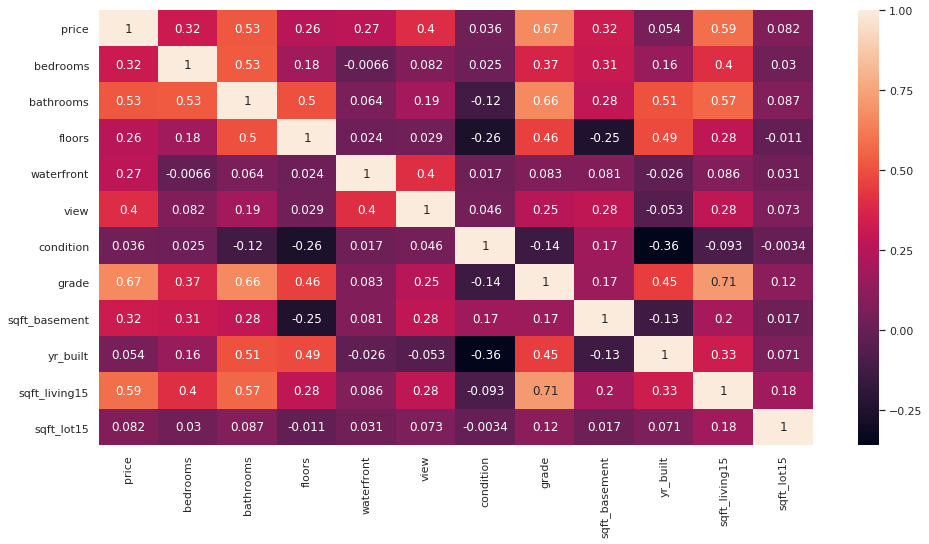

In [39]:
plt.figure(figsize=(16, 8))

vg_corr = houses.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

#Regression

##Multiple Linear Regression
We shall conduct PCA which shall do the reduction for the independent variables 


In [0]:
#Preprocessing 
#create the indepent variables 
X = houses.drop('price', 1)
y = np.log(houses['price'])

#Split the data
# 20% is for testing which 80% is for training the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [0]:
# Normalization
# PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Perform pca 
pca = PCA(n_components=12)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [43]:
regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

13.04800181591205
[ 0.18259482  0.12263072  0.00551754 -0.01489653  0.01046119 -0.08134744
 -0.12731053 -0.05176115 -0.05658186  0.18881601 -0.11906322  0.04115782]


The higher the intercept the more impact it has on the response variable

In [45]:
#conduct the explained variance ratio
#It has the amount of variance explained by each of the selected components. 
#The higher the variance is the more information the component would carry
pca.explained_variance_ratio_

array([0.28714977, 0.15599906, 0.10585301, 0.08766414, 0.08191089,
       0.06585296, 0.05535282, 0.0454118 , 0.04293831, 0.0323667 ,
       0.02021669, 0.01928385])

In [0]:
#the model
y_pred = regressor.predict(X_test)

When i use 4 variables the MSE IS 0.13
If i increase the variables,i get a better model with a MSE OF 0.098

In [47]:
#check how accurate our model will be 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.244248848284941
Mean Squared Error: 0.09662961863262348
Root Mean Squared Error: 0.3108530499007907


In [48]:
r2_score(y_test,y_pred)

0.6513405366073486

The accuracy has also improved from 50% to 63% when i use all the variables 

For Multiple linear regression to incorporated,we have to ensure we meet 4 conditions
1. No or low multicollinearity
2.Homoscedasticity
3.Normality
4.Independent variables should be independent

###Test for Multicollinearty

In [49]:
correlations = houses.corr()
correlations

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,1.000,0.315,0.525,0.257,0.266,0.397,0.036,0.667,0.324,0.054,0.585,0.082
bedrooms,0.315,1.000,0.529,0.181,-0.007,0.082,0.025,0.367,0.309,0.159,0.403,0.030
bathrooms,0.525,0.529,1.000,0.501,0.064,0.188,-0.125,0.665,0.284,0.506,0.569,0.087
floors,0.257,0.181,0.501,1.000,0.024,0.029,-0.264,0.458,-0.246,0.489,0.280,-0.011
waterfront,0.266,-0.007,0.064,0.024,1.000,0.402,0.017,0.083,0.081,-0.026,0.086,0.031
view,0.397,0.082,0.188,0.029,0.402,1.000,0.046,0.251,0.277,-0.053,0.280,0.073
condition,0.036,0.025,-0.125,-0.264,0.017,0.046,1.000,-0.145,0.174,-0.361,-0.093,-0.003
grade,0.667,0.367,0.665,0.458,0.083,0.251,-0.145,1.000,0.168,0.447,0.713,0.119
sqft_basement,0.324,0.309,0.284,-0.246,0.081,0.277,0.174,0.168,1.000,-0.133,0.200,0.017
yr_built,0.054,0.159,0.506,0.489,-0.026,-0.053,-0.361,0.447,-0.133,1.000,0.326,0.071


Dataframe with inverse of the correlation

In [50]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,2.677,0.097,-0.524,-0.194,-0.388,-0.234,-0.080,-1.327,-0.260,0.851,-0.447,0.033
bedrooms,0.097,1.521,-0.736,-0.016,0.032,0.124,-0.066,0.012,-0.238,0.180,-0.318,0.048
bathrooms,-0.524,-0.736,3.083,-0.768,0.041,0.005,-0.067,-0.431,-0.662,-0.885,-0.208,-0.050
floors,-0.194,-0.016,-0.768,1.902,0.010,-0.043,0.151,-0.365,0.707,-0.308,0.248,0.116
waterfront,-0.388,0.032,0.041,0.010,1.253,-0.460,0.008,0.205,0.065,-0.110,0.088,-0.011
view,-0.234,0.124,0.005,-0.043,-0.460,1.423,0.005,-0.057,-0.262,0.138,-0.208,-0.035
condition,-0.080,-0.066,-0.067,0.151,0.008,0.005,1.190,0.042,-0.075,0.362,0.048,-0.019
grade,-1.327,0.012,-0.431,-0.365,0.205,-0.057,0.042,3.433,0.001,-0.690,-1.098,-0.019
sqft_basement,-0.260,-0.238,-0.662,0.707,0.065,-0.262,-0.075,0.001,1.603,0.179,0.098,0.053
yr_built,0.851,0.180,-0.885,-0.308,-0.110,0.138,0.362,-0.690,0.179,2.054,-0.183,-0.040


The VIF score for each variable is found alongside the downwards sloping diagonal
The VIF is < 5 therefore our variables are not highly correlated.We can work with it a it is

###Residual plots

In [51]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.0024170345192466134

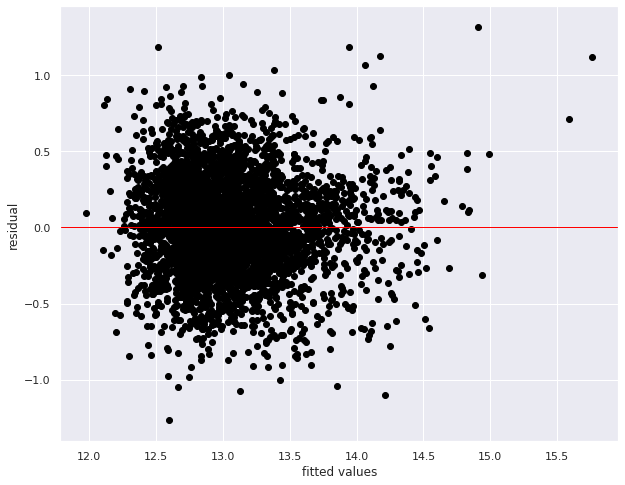

In [52]:
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

This data set is probably not a good fit for regression.
This plot shows heteroscedasticity
This could be as a result of the outliers

###Heteroscedasticity

In [53]:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



inf
the variances are homogeneous!


##Quantile Regression

In [0]:
#CREATE OUR FEATURES
X = houses.drop('price', 1)
y = np.log(houses['price'])

In [0]:
#perform a train and a test for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [64]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile

mod = smf.quantreg('y ~ X', houses)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4020
Model:                       QuantReg   Bandwidth:                     0.05417
Method:                 Least Squares   Sparsity:                       0.7935
Date:                Tue, 28 Jan 2020   No. Observations:                21612
Time:                        06:57:47   Df Residuals:                    21599
                                        Df Model:                           12
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6148      0.254     89.109      0.000      22.117      23.112
X[0]          -0.0126      0.004     -3.451      0.001      -0.020      -0.005
X[1]           0.1027      0.006     16.810      0.000       0.091       0.115
X[2]           0.1438      0.007     20.928      0.0

In [65]:
houses.dtypes

price             float64
bedrooms          float64
bathrooms         float64
floors            float64
waterfront        float64
view              float64
condition         float64
grade             float64
sqft_basement     float64
yr_built          float64
sqft_living15     float64
sqft_lot15        float64
year_renovated    float64
dtype: object

In [66]:
cols = houses.columns[houses.dtypes.eq('object')]
cols

Index([], dtype='object')

In [0]:
cols = houses.columns
houses[cols] = houses[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [68]:
##  we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['X']] + res.conf_int().loc['X'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

KeyError: ignored

##Ridge Regression

Due to presence of Mutlicollinearity,we shall consider using this regression

In [0]:
#create the features 
X = houses.drop('price', 1)
y = np.log(houses['price'])

In [0]:
#perform a train and a test for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [0]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=5)

In [89]:
#determine the strength of the model using best params and best score
search.fit(X_train,y_train)
search.best_params_
{'alpha': 0.001}
abs(search.best_score_) 


0.09695843206381824

The params has choosen its alpha as 0.001 for this model

Best score == MSE

In [73]:
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

0.09727624888573992


In [0]:
#model
y_pred=ridge.predict(X)

In [75]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,houses.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are about the same. This means that the penalization made little difference with this dataset.

{'bathrooms': 0.137537261603015,
 'bedrooms': 0.10549619952369467,
 'condition': 0.22789115965904494,
 'floors': 0.3916204454373649,
 'grade': 0.00013283761832968475,
 'price': -0.006585116744368781,
 'sqft_basement': -0.005654708290740785,
 'sqft_living15': -8.175221082979695e-08,
 'sqft_lot15': 0.024615516507028,
 'view': 0.0442176286041725,
 'waterfront': 0.03859356056041204,
 'yr_built': 0.00015315215083396374}

The number of floors has a large impact on the response variable followed by the year built followed by the number of bedrooms 

The difference between the model of Multiple linear regression and Ridge regression is very little
For multiple linear regression the MSE id 0.098 while Lasso's regression is 0.097

##Lasso Regression

This regression is good for us since it  shall determine the most useful variables 
It is also better than Ridge in reducing the variance in the models

In [0]:
#create the features 
X = houses.drop('price', 1)
y = np.log(houses['price'])

In [0]:
# Scaling data 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [78]:
# Creating lasso object
lasso = linear_model.Lasso() 

# Fitting the models
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.0
lasso MSE: 0.2775366558944639
lasso coef: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [79]:
#Splitting the data into training and test sets and choose your parameters with GridSearch
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.5023576567291526
linear score: 0.6513405366073486
lasso MSE: 0.1379196462295726
linear MSE: 0.09662961863262351
lasso best estimator coef: [ 0.          0.00508396  0.          0.          0.00460263  0.
  0.21648346  0.01636343 -0.          0.06383127  0.          0.        ]
linear coef: [-0.00932956  0.08374507  0.07265732  0.03189145  0.02863637  0.02630951
  0.26737341  0.06168285 -0.16708961  0.10384251 -0.0012005   0.00654737]


A model with the highest R-squared score will give us the best parameters.

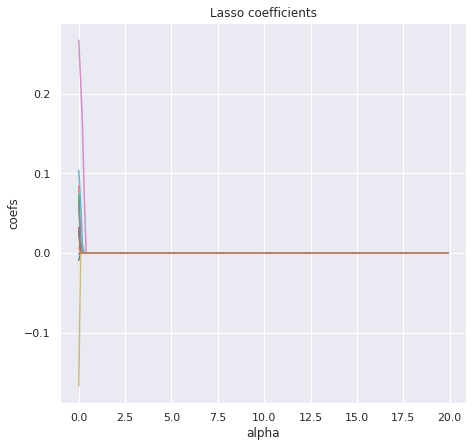

In [80]:

coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

##Elastic Net Regression

This regression implements both the Lasso and Ridge Regression

In [0]:
#create the features 
X = houses.drop('price', 1)
y = np.log(houses['price'])

In [0]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [83]:
#lets fit the best params and best score
search.fit(X,y)
search.best_params_
abs(search.best_score_)

0.09833528071383772

The params chooses 0.00001 as our alpha and a l1_ratio of 0.8

The elastic net regression has a MSE OF 0.9834

In [84]:
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

0.09769167293726441


In [85]:
#COEFFICIENTS
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 0.10146626690909485,
 'bedrooms': -0.0,
 'condition': 0.04231550355963114,
 'floors': 0.12639537974444712,
 'grade': 0.21103161346232724,
 'sqft_basement': 0.00013166297065065594,
 'sqft_living15': 0.0001560031677545288,
 'sqft_lot15': -0.0,
 'view': 0.042648200373714897,
 'waterfront': 0.3483486917015521,
 'year_renovated': 0.04656211330099363,
 'yr_built': -0.004982188897299751}

#Recommendations
1. Consider dropping outliers.That way you are more likely to get a better model 